In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import scipy.integrate as integrate
import os
import theoryLya as tLya
import Spectrograph as spectrograph
import Survey as survey
import effectiveStatistics as effStats

os.environ['PATH'] = '/global/common/sw/cray/sles15/x86_64/texlive/live/gcc/8.2.0/tiozj27/bin/x86_64-linux/:{}'.format(os.environ['PATH'])

from matplotlib import rc
import matplotlib.cm as cm
rc('font',**{'size':'20','family':'serif','serif':['CMU serif']})
rc('mathtext', **{'fontset':'cm'})
rc('text', usetex=True)
rc('legend',**{'fontsize':'13'})

import camb
from camb import model, initialpower

In [2]:
theory=tLya.theoryLya()

In [3]:
ks = np.logspace(-3, 0)

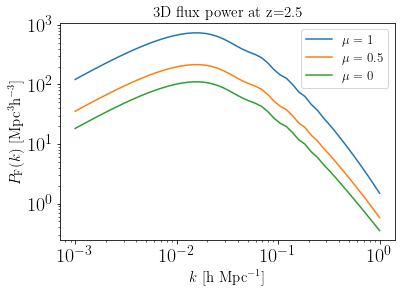

In [4]:
z = 2.5
plt.loglog(ks, theory.FluxP3D_McD2003_hMpc(z=z, k_hMpc=ks, mu=1), label='$\mu = 1$')
plt.loglog(ks, theory.FluxP3D_McD2003_hMpc(z=z, k_hMpc=ks, mu=0.5), label='$\mu = 0.5$')
plt.loglog(ks, theory.FluxP3D_McD2003_hMpc(z=z, k_hMpc=ks, mu=0), label='$\mu = 0$')
plt.xlabel(r'$k$ [h $\rm{Mpc}^{-1}$]',fontsize=15)
plt.ylabel(r'$P_{\rm{F}}(k)$ [$\rm{Mpc}^3 \rm{h}^{-3}$]',fontsize=15)
plt.title(r'3D flux power at z='+str(z),fontsize=15)
plt.legend()
plt.show()

/global/u2/n/nishant/DESI2_LyaProjections/DESI-II-lyaforecast/build/lib/theoryLya.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  p1d[i] = integrate.quad(integrand, 0, np.inf)[0]


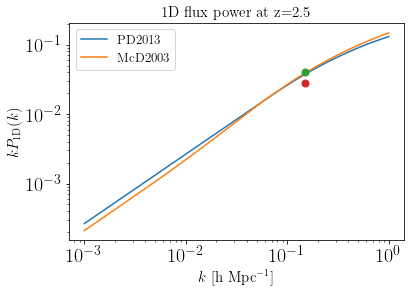

In [5]:
plt.loglog(ks, ks*theory.FluxP1D_PD2013_hMpc(z=z, k_hMpc=ks), label='PD2013')
plt.loglog(ks, ks*theory.FluxP1D_McD2003_hMpc(z=z, k_hMpc=ks), label='McD2003')
plt.plot(.15, .15*0.27, '.', markersize=14)
plt.plot(.15, .15*0.19, '.', markersize=14)

plt.xlabel(r'$k$ [h $\rm{Mpc}^{-1}$]',fontsize=15)
plt.ylabel(r'$k P_{\rm{1D}}(k)$ ',fontsize=15)
plt.title(r'1D flux power at z='+str(z),fontsize=15)
plt.legend()
plt.show()

In [6]:
theory.FluxP1D_McD2003_hMpc(z=np.array([2.5]), k_hMpc=np.array([.15]))

/global/u2/n/nishant/DESI2_LyaProjections/DESI-II-lyaforecast/build/lib/theoryLya.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  p1d[i] = integrate.quad(integrand, 0, np.inf)[0]


array([0.25949611])

In [7]:
path = "/global/homes/n/nishant/DESI2_LyaProjections/DESI-II-lyaforecast/build/lib/desi_SNR/"
DESI_instrument = spectrograph.Spectrograph(path)

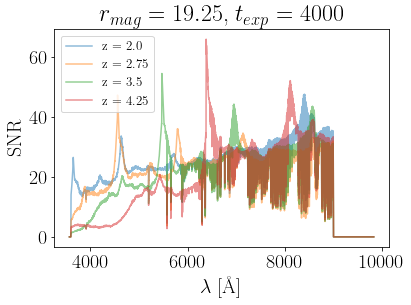

In [8]:
SNR, wavelengths, redshifts = DESI_instrument.openSNR('./desi_SNR/toto-r19.25-t4000-nexp4.dat')

plt.plot(wavelengths, SNR[:,0], label='z = ' + str(redshifts[0]), alpha=0.5)
plt.plot(wavelengths, SNR[:,3], label='z = ' + str(redshifts[3]), alpha=0.5)
plt.plot(wavelengths, SNR[:,6], label='z = ' + str(redshifts[6]), alpha=0.5)
plt.plot(wavelengths, SNR[:,9], label='z = ' + str(redshifts[9]), alpha=0.5)

plt.legend()
plt.xlabel(r'$\lambda$ [\AA]')
plt.ylabel('SNR')
plt.title('$r_{mag} = 19.25$, $t_{exp} = 4000$')
#plt.xlim(3570, 9020)
plt.show()

In [9]:
DESI1_survey = survey.Survey(nzr_file='./nzs/nzr_qso.dat', survey_A=16000)

In [10]:
#survey area in sq degrees
DESI1 = effStats.effectiveStatistics(theory, DESI1_survey, DESI_instrument)

In [11]:
DESI1.v_n(4000, 19.25, 2, k=0.1, SNR=2)

0.2610878615902446

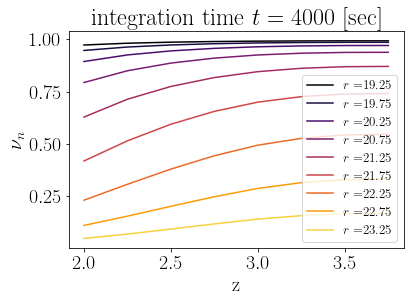

In [12]:
r_range = np.arange(19.25, 23.75, .5)
for i, r in enumerate(r_range):
    plt.plot(np.arange(2, 4, .25), DESI1.v_n(4000, r, np.arange(2, 4, .25), k=0.1), color=plt.cm.inferno(i/(len(r_range))), label=r'$r = $' + str(r))
plt.legend()
plt.title(r'integration time $t = 4000$ [sec]')
plt.xlabel(r'z')
plt.ylabel(r'$\nu_{n}$')
plt.savefig('v_n_vs_z.pdf', bbox_inches='tight')
plt.show()


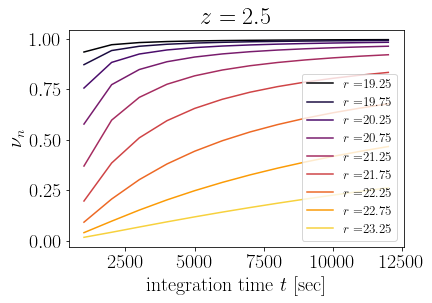

In [13]:
r_range = np.arange(19.25, 23.75, .5)
for i, r in enumerate(r_range):
    plt.plot(np.arange(1000,13000,1000), DESI1.v_n(np.arange(1000,13000,1000), r, 2.5, k=0.1), color=plt.cm.inferno(i/(len(r_range))), label=r'$r = $' + str(r))
plt.legend()
plt.title(r'$z=2.5$')
plt.xlabel(r'integration time $t$ [sec]')
plt.ylabel(r'$\nu_{n}$')
plt.savefig('v_n_vs_t.pdf', bbox_inches='tight')

plt.show()

In [14]:
DESI1.v_n(4000, 19.25, 2, k=0.1, SNR=2)

0.2610878615902446

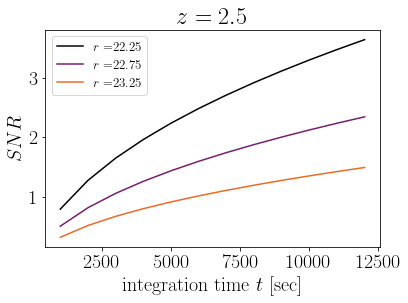

In [26]:
r_range = np.arange(22.25, 23.75, .5)
for i, r in enumerate(r_range):
    plt.plot(np.arange(1000,13000,1000), DESI1.Spectrograph.snr(np.arange(1000,13000,1000), r, 2.5,), color=plt.cm.inferno(i/(len(r_range))), label=r'$r = $' + str(r))
plt.legend()
plt.title(r'$z=2.5$')
plt.xlabel(r'integration time $t$ [sec]')
plt.ylabel(r'$SNR$')
plt.savefig('v_n_vs_t.pdf', bbox_inches='tight')

plt.show()

In [16]:
from astropy.table import Table

tt=Table.read('lya-snr-guadalupe.fits')

qso=tt[ (tt['Z']>2.4)&(tt['Z']<2.6) ]


In [17]:
nu_n_guad = np.zeros(shape=len(qso))

for i, item in enumerate(qso):
    nu_n_guad[i] = DESI1.v_n(4000, 22.25, item['Z'], k=0.15, SNR=item['SNR'])

/global/u2/n/nishant/DESI2_LyaProjections/DESI-II-lyaforecast/build/lib/Spectrograph.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  P_Nn = 0.8 * tLya.meanFlux(z)**(-2) * SNR**(-2) * delta_lambda * ((1+z)/4)**(-3/2)


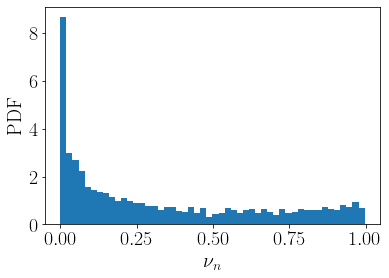

In [18]:
n, bins, patches = plt.hist(nu_n_guad, bins=50, density=True)
plt.xlabel(r'$\nu_{n}$')
plt.ylabel('PDF')
plt.show()

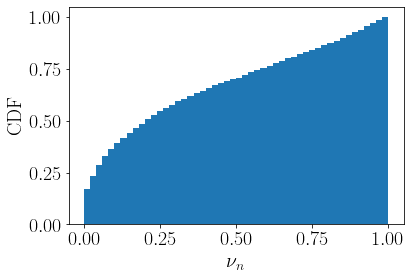

<function ndarray.max>

In [19]:
n, bins, patches = plt.hist(nu_n_guad, bins=np.linspace(0,1,51), density=True, cumulative=True)
plt.xlabel(r'$\nu_{n}$')
plt.ylabel('CDF')
plt.show()

np.sum(n.max)

In [20]:
n_martin = np.load('n.npy')

Text(0, 0.5, 'n_{nishant} / n_{martin}')

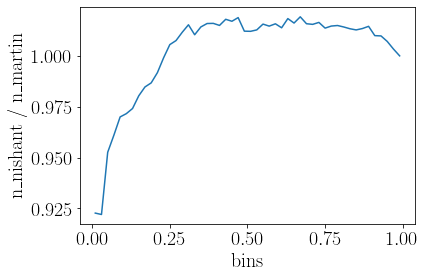

In [21]:
center = (bins[:-1] + bins[1:]) / 2

plt.plot(center, n/n_martin)
plt.xlabel('bins')
plt.ylabel('n_{nishant} / n_{martin}')